<a href="https://colab.research.google.com/github/fitrasaphira/IBM-HR-Analytics-Employee-Attrition/blob/main/IBM_HR_Analytics_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IBM Employee Atrrition Analysis**


##**Content**

- Objective & Data Overview
- Data Cleaning and Preparation
- Exploratory Data Analysis

## **Objective & Data Overview**

**Objective** : Identify the factors that contribute to employee attrition and explore the critical issues. <br>IBM data scientists created this fictitious data set. The following below are the categorical features in the dataset :

**Education** <br>
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

**Environment Satisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**Job Involvement** 
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**Job Satisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**Performance Rating**
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

**Relationship Satisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**Work Life Balance**
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

Link of the data is provided in this [Kaggle dataset link](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download)

# **Import Libary and Datasets**

**Code Preparation**

In [1]:
! pip install skimpy

#for data manipulation
import pandas as pd
from skimpy import clean_columns #clean columns header

#for date manipulation
from datetime import datetime
from datetime import timedelta
from datetime import date

#for liniear algebra
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

#Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, ShuffleSplit
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, plot_roc_curve, classification_report

import warnings
warnings.filterwarnings('ignore')

from sklearn import cluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 36.9 MB/s 
     |████████████████████████████████| 1.1 MB 51.1 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1q7mQWM2Gt7Jd6phDNLnAEcdZbfI4RlV_xjDauNPqBdk/edit#gid=976490543'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Clean the name of all variable**

In [5]:
df = clean_columns(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1470 non-null   object
 3   daily_rate                  1470 non-null   int64 
 4   department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   int64 
 7   education_field             1470 non-null   object
 8   employee_count              1470 non-null   int64 
 9   employee_number             1470 non-null   int64 
 10  environment_satisfaction    1470 non-null   int64 
 11  gender                      1470 non-null   object
 12  hourly_rate                 1470 non-null   int64 
 13  job_involvement             1470 non-null   int6

# **Data Cleaning and Preparation**



## **Handling Missing Values**

**Checking the null value**

In [6]:
df.isnull().sum()

age                           0
attrition                     0
business_travel               0
daily_rate                    0
department                    0
distance_from_home            0
education                     0
education_field               0
employee_count                0
employee_number               0
environment_satisfaction      0
gender                        0
hourly_rate                   0
job_involvement               0
job_level                     0
job_role                      0
job_satisfaction              0
marital_status                0
monthly_income                0
monthly_rate                  0
num_companies_worked          0
over_18                       0
over_time                     0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
standard_hours                0
stock_option_level            0
total_working_years           0
training_times_last_year      0
work_life_balance             0
years_at

Apparently there is no missing value in the dataset

## **Removing Irrelevant Values**

**Checking the correlation of numerical column**

In [7]:
numerical_column= df.copy()
numerical_column.drop(columns=['attrition','business_travel','department','education_field','gender','job_role','marital_status','over_18','over_time'],inplace=True)
numerical_column

,age,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [8]:
numerical_column.corr()

,age,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
daily_rate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
distance_from_home,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
employee_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employee_number,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
environment_satisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
hourly_rate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
job_involvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
job_level,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


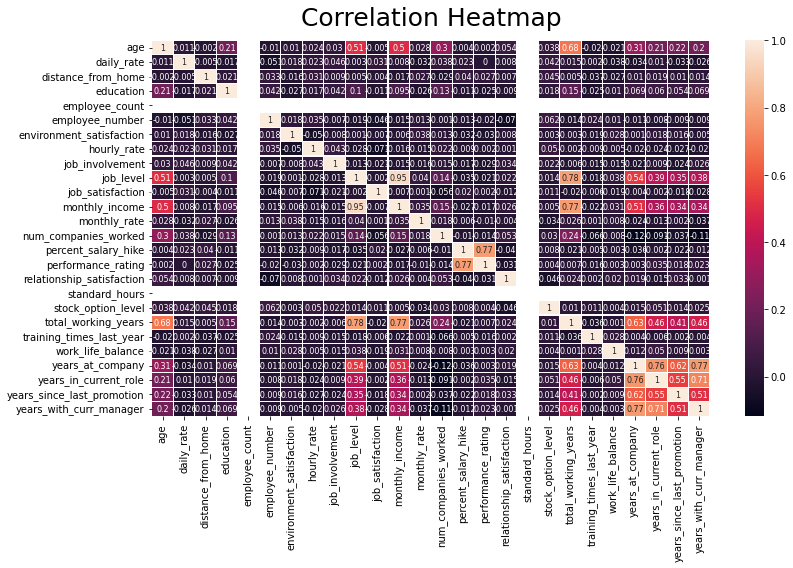

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(numerical_column.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

There is blank correlation for **employee_count** and **standard_hours**. Lets check the overall unique value.

In [10]:
for i in df.columns:
  unique_data = df[i].value_counts()
  print(unique_data,'\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: age, dtype: int64 

No     1233
Yes     237
Name: attrition, dtype: int64 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: business_travel, dtype: int64 

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: daily_rate, Length: 886, dtype: int64 

Research & Development    961
Sales                     446
Human Resources            63
Name: department, dtype: int64 

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23    

Because **employee_count**, **over_18**, and **standard_hours** just have one value lets just remove it

In [11]:
df.drop(columns=['employee_count','over_18','standard_hours'],inplace=True)
df

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


## **Handling Outliers**

Lets see boxplot of the numerical column

In [12]:
import plotly.express as px


fig = px.box(numerical_column.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable", facet_col_wrap=4, width = 1100, height = 2000, facet_col_spacing=0.1, facet_row_spacing=0.02 )
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

Because the outliers are organic outliers, so lets just ignore it.

#**Exploratory Data Analysis**

- Descriptive Statistics
- Checking the distribution of the data
- Evaluate the categorical and numerical features 
- Using a correlation matrix to discover relationships between features
- Features plot with attrition variable

**Descriptive Statistics**

In [13]:
df.describe()

,age,daily_rate,distance_from_home,education,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Lets check the distribution of the data by make histogram from each numerical data

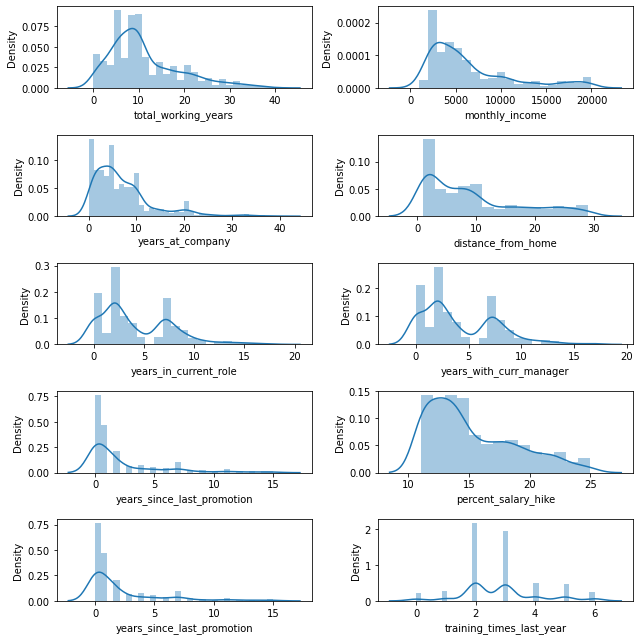

In [14]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['total_working_years'], ax = ax[0,0]) 
sns.distplot(df['monthly_income'], ax = ax[0,1]) 
sns.distplot(df['years_at_company'], ax = ax[1,0]) 
sns.distplot(df['distance_from_home'], ax = ax[1,1]) 
sns.distplot(df['years_in_current_role'], ax = ax[2,0]) 
sns.distplot(df['years_with_curr_manager'], ax = ax[2,1]) 
sns.distplot(df['years_since_last_promotion'], ax = ax[3,0]) 
sns.distplot(df['percent_salary_hike'], ax = ax[3,1]) 
sns.distplot(df['years_since_last_promotion'], ax = ax[4,0]) 
sns.distplot(df['training_times_last_year'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

Now lets check the distribution for categorical data

In [15]:
categorical_column = df.select_dtypes(include='object')
categorical_column.columns

Index(['attrition', 'business_travel', 'department', 'education_field',
       'gender', 'job_role', 'marital_status', 'over_time'],
      dtype='object')

To simplified visulization process for each categorical features, i made a function that i learned from others project.

In [16]:
def cat_viz(attr,labels=None):
    if(attr=='jobrole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr) 
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

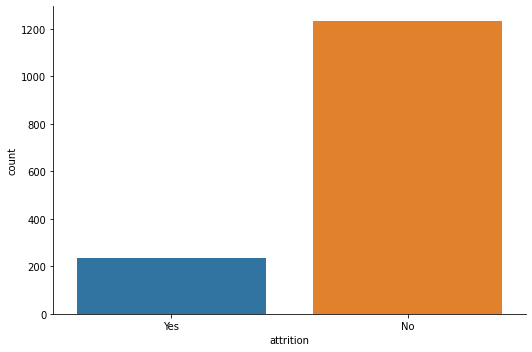

In [17]:
cat_viz('attrition')

The number in 'No' category in attrition column way greater than 'Yes' category.

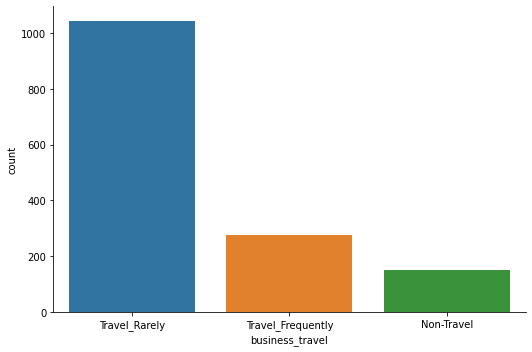

In [18]:
cat_viz('business_travel')

Most of the employee is rarely to travel rather than frequently travel and not travel at all.

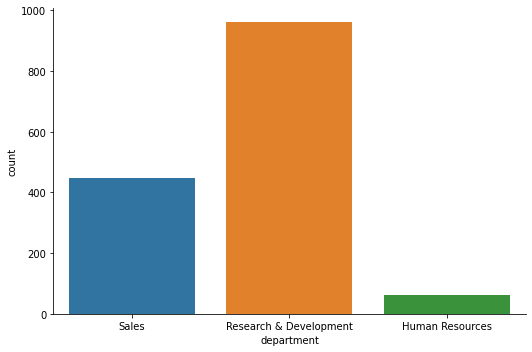

In [19]:
cat_viz('department')

Most of the employee from **Research & Development** department, the second is in **Sales** department, and the least in **Human Resource** department.

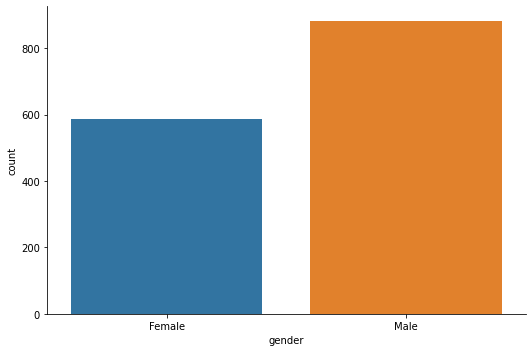

In [20]:
cat_viz('gender')

The number of **male** employee is greater than **female** employee.

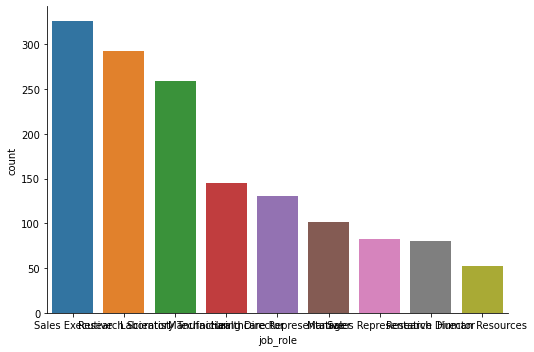

In [21]:
cat_viz('job_role')

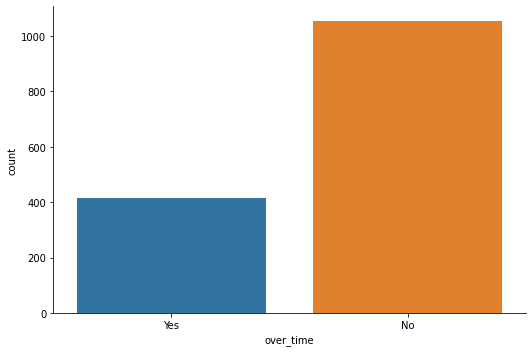

In [22]:
cat_viz('over_time')

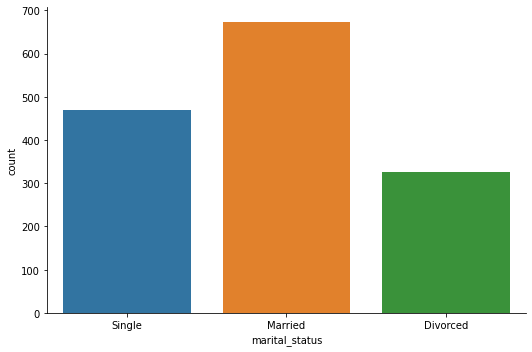

In [23]:
cat_viz('marital_status')

The number of **married** employee is greater than **single** and **divorced** employee.

Now lets check the correlation between each features

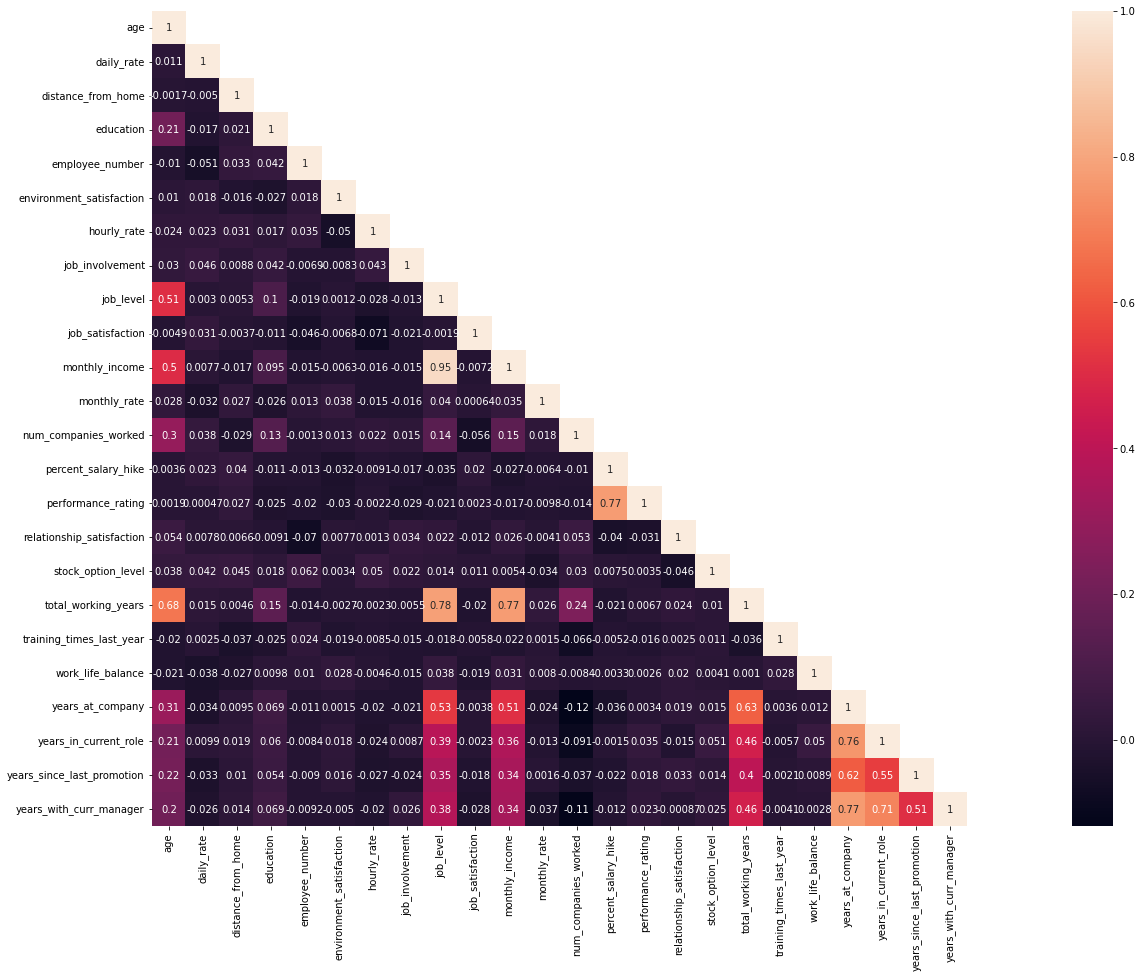

In [24]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(37.5,15)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

**Insight**
> - **Age** have high correlation with **job level** and **monthly income**, it expected because the older employee tend to have higher position in the company followed by higher monthly income.
- **Total working years** have high correlation with **age**, **job level**, and **monthly income**, which expected nbecause senior employee have longer work duration in the company.
- **Performance rating** is highly corelated **percent salary hike** which expected the higher performence of the employee the higher the  salary hike
- **Years at company** have high correlation with **years current role**, **manager**, and **last promotion**.





#**Plotting features with attrition rate**

**Department**

In [25]:
df_plot=df.copy()
df_plot = pd.pivot_table(df_plot, values='age', index = 'department', columns = 'attrition', aggfunc = 'count', margins=True)
df_plot['%'] = round((df_plot['Yes']/(df_plot['No'] + df_plot['Yes']))*100,2)
df_plot['percentage'] = pd.Series(df_plot['%'], dtype='string') + '%'
df_plot

attrition,No,Yes,All,%,percentage
department,,,,,
Human Resources,51,12,63,19.05,19.05%
Research & Development,828,133,961,13.84,13.84%
Sales,354,92,446,20.63,20.63%
All,1233,237,1470,16.12,16.12%


In [26]:
fig = px.bar(df_plot, x=df_plot.index, y='%', color=df_plot.index, text='percentage')
fig.show()

**Sales department** have the highest ratio of employee attrition (20.63%)

**Job Role**

In [27]:
df_plot=df.copy()
df_plot = pd.pivot_table(df_plot, values='age', index = 'job_role', columns = 'attrition', aggfunc = 'count')
df_plot['%'] = round((df_plot['Yes']/(df_plot['No'] + df_plot['Yes']))*100,2)
df_plot['percentage'] = pd.Series(df_plot['%'], dtype='string') + '%'
df_plot

attrition,No,Yes,%,percentage
job_role,,,,
Healthcare Representative,122,9,6.87,6.87%
Human Resources,40,12,23.08,23.08%
Laboratory Technician,197,62,23.94,23.94%
Manager,97,5,4.90,4.9%
Manufacturing Director,135,10,6.90,6.9%
Research Director,78,2,2.50,2.5%
Research Scientist,245,47,16.10,16.1%
Sales Executive,269,57,17.48,17.48%
Sales Representative,50,33,39.76,39.76%


In [28]:
fig = px.bar(df_plot, x=df_plot.index, y='%', color=df_plot.index, text='percentage')
fig.show()

Attrition ratio of **Sales Representatitive** is way higher than other job roles.

**Age**

In [29]:
df['age_group'] = 0;
df['age_group'][df['age']>10] = 'Gen Z';
df['age_group'][df['age']>25] = 'Millenials';
df['age_group'][df['age']>41] = 'Gen X';
df['age_group'][df['age']>57] = 'Boomers';
df

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,...,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,age_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,Millenials
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,Gen X
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,Millenials
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,Millenials
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,Millenials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,1,17,3,3,5,2,0,3,Millenials
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,1,9,5,3,7,7,1,7,Millenials
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,1,6,0,3,6,2,0,3,Millenials
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,0,17,3,2,9,6,0,8,Gen X


In [30]:
df_plot=df.copy()
df_plot = pd.pivot_table(df_plot, values='department', index = 'age_group', columns = 'attrition', aggfunc = 'count', margins=True)
df_plot['%'] = round((df_plot['Yes']/(df_plot['No'] + df_plot['Yes']))*100,2)
df_plot['percentage'] = pd.Series(df_plot['%'], dtype='string') + '%'
df_plot

attrition,No,Yes,All,%,percentage
age_group,,,,,
Boomers,24,5,29,17.24,17.24%
Gen X,355,41,396,10.35,10.35%
Gen Z,79,44,123,35.77,35.77%
Millenials,775,147,922,15.94,15.94%
All,1233,237,1470,16.12,16.12%


In [31]:
fig = px.bar(df_plot, x=df_plot.index, y='%', color=df_plot.index, text='percentage')
fig.show()

**Gen Z** have the highest percentage of employee attrition which expected because Gen Z tend to change jobs after short periods of time (within 1-3 months).

**Gender**

In [32]:
df_edu=df.copy()
df_edu = pd.pivot_table(df_edu, values='age', index = 'gender', columns = 'attrition', aggfunc = 'count')
df_edu['percentage'] = (df_edu['Yes']/(df_edu['No'] + df_edu['Yes']))*100
df_edu

attrition,No,Yes,percentage
gender,,,
Female,501,87,14.795918
Male,732,150,17.006803


Over 85% of females tend to stay with the company while only 15% want to leave. Overall, 83% of employees desire to stay with the organization, with only 16% wanting to quit the organization or company.

**Marital Status**

In [33]:
df_edu=df.copy()
df_edu = pd.pivot_table(df_edu, values='age', index = 'marital_status', columns = 'attrition', aggfunc = 'count')
df_edu['percentage'] = (df_edu['Yes']/(df_edu['No'] + df_edu['Yes']))*100
df_edu

attrition,No,Yes,percentage
marital_status,,,
Divorced,294,33,10.091743
Married,589,84,12.481426
Single,350,120,25.531915


Attrition ratio of **single employees** is way higher that divorced and married employees.

**Environtment Satisfaction**

In [34]:
df_edu=df.copy()
df_edu = pd.pivot_table(df_edu, values='age', index = 'environment_satisfaction', columns = 'attrition', aggfunc = 'count')
df_edu['percentage'] = (df_edu['Yes']/(df_edu['No'] + df_edu['Yes']))*100
df_edu

attrition,No,Yes,percentage
environment_satisfaction,,,
1,212,72,25.352113
2,244,43,14.982578
3,391,62,13.686534
4,386,60,13.452915


The better employee's environment satisfaction the lower percentage of their 
attrition.

**Job Satisfaction**

In [35]:
df_edu=df.copy()
df_edu = pd.pivot_table(df_edu, values='age', index = 'job_satisfaction', columns = 'attrition', aggfunc = 'count')
df_edu['percentage'] = (df_edu['Yes']/(df_edu['No'] + df_edu['Yes']))*100
df_edu

attrition,No,Yes,percentage
job_satisfaction,,,
1,223,66,22.837370
2,234,46,16.428571
3,369,73,16.515837
4,407,52,11.328976


Same with the environment satisfaction, the higher employee's job satisfaction the lower percentage of their attrition.

**Realationship Satisfaction**

In [36]:
df_edu=df.copy()
df_edu = pd.pivot_table(df_edu, values='age', index = 'relationship_satisfaction', columns = 'attrition', aggfunc = 'count')
df_edu['percentage'] = (df_edu['Yes']/(df_edu['No'] + df_edu['Yes']))*100
df_edu

attrition,No,Yes,percentage
relationship_satisfaction,,,
1,219,57,20.652174
2,258,45,14.851485
3,388,71,15.468410
4,368,64,14.814815


The higher employee's relationship the lower percentage of their attrition.

**Work Life Balance**

In [37]:
df_edu=df.copy()
df_edu = pd.pivot_table(df_edu, values='age', index = 'work_life_balance', columns = 'attrition', aggfunc = 'count')
df_edu['percentage'] = (df_edu['Yes']/(df_edu['No'] + df_edu['Yes']))*100
df_edu

attrition,No,Yes,percentage
work_life_balance,,,
1,55,25,31.250000
2,286,58,16.860465
3,766,127,14.221725
4,126,27,17.647059


Again, the higher employee's work life balance, the lower percentage of their attrition. Later we will try to group employees based on each different level of satisfaction

**Job involvement**

In [38]:
df_edu=df.copy()
df_edu = pd.pivot_table(df_edu, values='age', index = 'job_involvement', columns = 'attrition', aggfunc = 'count')
df_edu['percentage'] = (df_edu['Yes']/(df_edu['No'] + df_edu['Yes']))*100
df_edu

attrition,No,Yes,percentage
job_involvement,,,
1,55,28,33.734940
2,304,71,18.933333
3,743,125,14.400922
4,131,13,9.027778


The data shows the higher value of job involvement, the lower ratio employee want to leave company.

**Monthly Income**

In [39]:
df_income_yes = df[['monthly_income','attrition']]
df_income_yes = df_income_yes[
  df_income_yes['attrition'].isin(['Yes'])]

df_income_no = df[['monthly_income','attrition']]
df_income_no = df_income_no[
  df_income_no['attrition'].isin(['No'])]

In [40]:
numerical_column = df_income_yes[['monthly_income']]
fig = px.box(numerical_column.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable", facet_col_wrap=4, width = 500, height = 500, facet_col_spacing=0.05, title ="Monthly Income for 'Yes' Attrition")
fig.update_yaxes(matches=None)

fig.show()

numerical_column_2 = df_income_no[['monthly_income']]
fig_2 = px.box(numerical_column_2.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable", facet_col_wrap=4, width = 500, height = 500, facet_col_spacing=0.05, title ="Monthly Income for 'No' Attrition")
fig_2.update_yaxes(matches=None)

fig_2.show()

Median of monthly income for employee with 'Yes' attrition rate (3202) have lower number than employee with 'No' attrition (5204), that means employee who are not get well paid tend to leave the company.

**Percent Salary Hike**

In [41]:
df_edu=df.copy()
df_edu = pd.pivot_table(df_edu, values='age', index = 'percent_salary_hike', columns = 'attrition', aggfunc = 'count')
df_edu['percentage'] = (df_edu['Yes']/(df_edu['No'] + df_edu['Yes']))*100
df_edu

attrition,No,Yes,percentage
percent_salary_hike,,,
11,169,41,19.523810
12,165,33,16.666667
13,175,34,16.267943
14,177,24,11.940299
15,83,18,17.821782
16,64,14,17.948718
17,68,14,17.073171
18,76,13,14.606742
19,67,9,11.842105


Same with monthly income, employee that have low percent salary hike tend to leave the company.

**Over Time**

In [42]:
df_edu=df.copy()
df_edu = pd.pivot_table(df_edu, values='age', index = 'over_time', columns = 'attrition', aggfunc = 'count')
df_edu['percentage'] = (df_edu['Yes']/(df_edu['No'] + df_edu['Yes']))*100
df_edu

attrition,No,Yes,percentage
over_time,,,
No,944,110,10.436433
Yes,289,127,30.528846


30% employee who have over time at work want to leave the company, this percentage is higher than employee who doesnt have over time.

**Stock Option Level**

In [43]:
df_plot=df.copy()
df_plot = pd.pivot_table(df_plot, values='age', index = 'stock_option_level', columns = 'attrition', aggfunc = 'count')
df_plot['%'] = round((df_plot['Yes']/(df_plot['No'] + df_plot['Yes']))*100,2)
df_plot['percentage'] = pd.Series(df_plot['%'], dtype='string') + '%'
df_plot

attrition,No,Yes,%,percentage
stock_option_level,,,,
0,477,154,24.41,24.41%
1,540,56,9.40,9.4%
2,146,12,7.59,7.59%
3,70,15,17.65,17.65%


In [44]:
fig = px.bar(df_plot, x=df_plot.index, y='%', color=df_plot.index, text='percentage', title= 'Stock Option Level vs Attrition Ratio')
fig.show()

There is no trend from this chart, but we can see that employee that have 0 level stock option have the highest ration of attrition.

**Number Companies Worked**

In [45]:
df_plot=df.copy()
df_plot = pd.pivot_table(df_plot, values='age', index = 'num_companies_worked', columns = 'attrition', aggfunc = 'count')
df_plot['%'] = round((df_plot['Yes']/(df_plot['No'] + df_plot['Yes']))*100,2)
df_plot['percentage'] = pd.Series(df_plot['%'], dtype='string') + '%'
df_plot

attrition,No,Yes,%,percentage
num_companies_worked,,,,
0,174,23,11.68,11.68%
1,423,98,18.81,18.81%
2,130,16,10.96,10.96%
3,143,16,10.06,10.06%
4,122,17,12.23,12.23%
5,47,16,25.40,25.4%
6,54,16,22.86,22.86%
7,57,17,22.97,22.97%
8,43,6,12.24,12.24%


In [46]:
fig = px.bar(df_plot, x=df_plot.index, y='%', color=df_plot.index, text='percentage', title= 'Num Companies Worked vs Attrition Ratio')
fig.show()

Employee that have worked in more than 4 different companies have the higher ratio of attrition than who worked in 4 or less different companies.

**Total Working Years**

In [47]:
df_plot=df.copy()
df_plot = pd.pivot_table(df_plot, values='age', index = 'total_working_years', columns = 'attrition', aggfunc = 'count')
df_plot['%'] = round((df_plot['Yes']/(df_plot['No'] + df_plot['Yes']))*100,2)
df_plot['%'].fillna(0,axis=0,inplace=True)
df_plot['percentage'] = pd.Series(df_plot['%'], dtype='string') + '%'
df_plot

attrition,No,Yes,%,percentage
total_working_years,,,,
0,6.0,5.0,45.45,45.45%
1,41.0,40.0,49.38,49.38%
2,22.0,9.0,29.03,29.03%
3,33.0,9.0,21.43,21.43%
4,51.0,12.0,19.05,19.05%
5,72.0,16.0,18.18,18.18%
6,103.0,22.0,17.60,17.6%
7,63.0,18.0,22.22,22.22%
8,87.0,16.0,15.53,15.53%


In [48]:
fig = px.bar(df_plot, x=df_plot.index, y='%', color=df_plot.index, text='percentage', title= 'Total Working Years vs Attrition Ratio')
fig.show()

From the chart above we can see employee that worked in company <10 years companies have higher percentage of attrition that who worked >10 years.

**Training Times Last Year**

In [49]:
df_edu=df.copy()
df_edu = pd.pivot_table(df_edu, values='age', index = 'training_times_last_year', columns = 'attrition', aggfunc = 'count')
df_edu['percentage'] = (df_edu['Yes']/(df_edu['No'] + df_edu['Yes']))*100
df_edu

attrition,No,Yes,percentage
training_times_last_year,,,
0,39,15,27.777778
1,62,9,12.676056
2,449,98,17.915905
3,422,69,14.052953
4,97,26,21.138211
5,105,14,11.764706
6,59,6,9.230769


Employee that have few training times tend to leave the company.

**Years at Company**

In [50]:
df_plot=df.copy()
df_plot = pd.pivot_table(df_plot, values='age', index = 'years_at_company', columns = 'attrition', aggfunc = 'count')
df_plot['%'] = round((df_plot['Yes']/(df_plot['No'] + df_plot['Yes']))*100,2)
df_plot['%'].fillna(0,axis=0,inplace=True)
df_plot['percentage'] = pd.Series(df_plot['%'], dtype='string') + '%'
df_plot

attrition,No,Yes,%,percentage
years_at_company,,,,
0,28.0,16.0,36.36,36.36%
1,112.0,59.0,34.50,34.5%
2,100.0,27.0,21.26,21.26%
3,108.0,20.0,15.62,15.62%
4,91.0,19.0,17.27,17.27%
5,175.0,21.0,10.71,10.71%
6,67.0,9.0,11.84,11.84%
7,79.0,11.0,12.22,12.22%
8,71.0,9.0,11.25,11.25%


In [51]:
fig = px.bar(df_plot, x=df_plot.index, y='%', color=df_plot.index, text='percentage', title= 'Years at Company vs Attrition Ratio')
fig.show()

Employee who  worked at the company less than 10 years is tend to leave the company than who worked 10-20 years. But we can see employee who worked 23 years have the highest percentage of attrition (50%)

**Years Since Last Promotion**

In [52]:
df_plot=df.copy()
df_plot = pd.pivot_table(df_plot, values='age', index = 'years_since_last_promotion', columns = 'attrition', aggfunc = 'count')
df_plot['%'] = round((df_plot['Yes']/(df_plot['No'] + df_plot['Yes']))*100,2)
df_plot['%'].fillna(0,axis=0,inplace=True)
df_plot['percentage'] = pd.Series(df_plot['%'], dtype='string') + '%'
df_plot

attrition,No,Yes,%,percentage
years_since_last_promotion,,,,
0,471.0,110.0,18.93,18.93%
1,308.0,49.0,13.73,13.73%
2,132.0,27.0,16.98,16.98%
3,43.0,9.0,17.31,17.31%
4,56.0,5.0,8.20,8.2%
5,43.0,2.0,4.44,4.44%
6,26.0,6.0,18.75,18.75%
7,60.0,16.0,21.05,21.05%
8,18.0,NaN,0.00,0.0%


In [53]:
fig = px.bar(df_plot, x=df_plot.index, y='%', color=df_plot.index, text='percentage', title= 'Years Since Last Promotion vs Attrition Ratio')
fig.show()

#**Logistic Regression**

In [54]:
from sklearn.model_selection import cross_val_score #how will our model perform if we take new unseen data
from sklearn.linear_model import LogisticRegression
import numpy as np

In [55]:
df['Attrition'] = 0;
df['Attrition'][df['attrition']=='Yes'] = 1;
df['Attrition'][df['attrition']=='No'] = 0;

In [56]:
num_df=df.select_dtypes(include='int64')
num_df.columns

Index(['age', 'daily_rate', 'distance_from_home', 'education',
       'employee_number', 'environment_satisfaction', 'hourly_rate',
       'job_involvement', 'job_level', 'job_satisfaction', 'monthly_income',
       'monthly_rate', 'num_companies_worked', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager', 'Attrition'],
      dtype='object')

In [57]:
# generate x and y
x = num_df.iloc[:,:-1];
y = num_df['Attrition'].ravel();
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         1470 non-null   int64
 1   daily_rate                  1470 non-null   int64
 2   distance_from_home          1470 non-null   int64
 3   education                   1470 non-null   int64
 4   employee_number             1470 non-null   int64
 5   environment_satisfaction    1470 non-null   int64
 6   hourly_rate                 1470 non-null   int64
 7   job_involvement             1470 non-null   int64
 8   job_level                   1470 non-null   int64
 9   job_satisfaction            1470 non-null   int64
 10  monthly_income              1470 non-null   int64
 11  monthly_rate                1470 non-null   int64
 12  num_companies_worked        1470 non-null   int64
 13  percent_salary_hike         1470 non-null   int64
 14  performa

In [58]:
num_df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [60]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
classifiers= []
classifiers.append(KNeighborsClassifier(n_neighbors=1))
classifiers.append(LogisticRegression())
classifiers.append(GaussianNB())
classifiers.append(RandomForestClassifier(max_depth=5))

Use train test split to see accuracy percentage each fitting model

In [62]:
#train-test split 
accuracy_results1= []
for a in classifiers:
  accuracy_results1.append(round(accuracy_score(y_test, a.fit(X_train, y_train).predict(X_test))*100,2))#y_pred))

In [63]:
eval_frame= pd.DataFrame()
eval_frame['Model']= ["KNN", "Logistic Regression", "Naive Bayes", "Random Forest"]
eval_frame['train_test_split']= accuracy_results1
eval_frame

,Model,train_test_split
0,KNN,79.35
1,Logistic Regression,87.77
2,Naive Bayes,75.00
3,Random Forest,86.68


Lets choose Logistic Regression because it has an accuracy of 87.77%

**Logistic Regression**

In [64]:
logreg_imbalanced = LogisticRegression(fit_intercept=True, solver='newton-cg', random_state=0);
logreg_imbalanced.fit(x,y);
print("logreg_imbalanced accuracy: ",logreg_imbalanced.score(x,y));

#how will our model perform if we take new unseen data
cvs_imbalanced = cross_val_score(logreg_imbalanced,x,y,cv=5);
print("crossvalidation logreg_imbalanced accuracy: \n", cvs_imbalanced);
print("avg crossvalidation logreg_imbalanced accuracy:", np.mean(cvs_imbalanced));
print("\n");

#how will our model perform if we take new unseen data + we don't discriminate target with less sample
cvs_imbalanced = cross_val_score(logreg_imbalanced,x,y,cv=5,scoring='balanced_accuracy');
print("crossvalidation logreg_imbalanced balanced_accuracy: \n", cvs_imbalanced);
print("avg crossvalidation logreg_imbalanced balanced_accuracy:", np.mean(cvs_imbalanced));
print("\n");

##how will our model perform if we take new unseen data + if we average all possible class tresholds (ex: using 0.6 instead of 0.5, etc)
cvs_imbalanced = cross_val_score(logreg_imbalanced,x,y,cv=5,scoring='roc_auc_ovr');
print("crossvalidation logreg_imbalanced roc_auc_ovr: \n", cvs_imbalanced);
print("avg crossvalidation logreg_imbalanced roc_auc_ovr:", np.mean(cvs_imbalanced));

logreg_imbalanced accuracy:  0.8598639455782313
crossvalidation logreg_imbalanced accuracy: 
 [0.85034014 0.84693878 0.85714286 0.86054422 0.85034014]
avg crossvalidation logreg_imbalanced accuracy: 0.8530612244897959


crossvalidation logreg_imbalanced balanced_accuracy: 
 [0.56681911 0.55640244 0.63071755 0.60689982 0.54914291]
avg crossvalidation logreg_imbalanced balanced_accuracy: 0.5819963633836097


crossvalidation logreg_imbalanced roc_auc_ovr: 
 [0.79395325 0.74839092 0.74631751 0.74459471 0.7602722 ]
avg crossvalidation logreg_imbalanced roc_auc_ovr: 0.7587057198636419


In [65]:
logreg_balanced = LogisticRegression(fit_intercept=True, solver='newton-cg', class_weight='balanced', random_state=0);
logreg_balanced.fit(x,y);
print("logreg_balanced accuracy: ",logreg_balanced.score(x,y));

#how will our model perform if we take new unseen data
cvs_balanced = cross_val_score(logreg_balanced,x,y,cv=5);
print("crossvalidation logreg_balanced accuracy: \n", cvs_balanced);
print("avg crossvalidation logreg_balanced accuracy:", np.mean(cvs_balanced));
print("\n");

#how will our model perform if we take new unseen data + we don't discriminate target with less sample
cvs_balanced = cross_val_score(logreg_balanced,x,y,cv=5,scoring='balanced_accuracy');
print("crossvalidation logreg_balanced balanced_accuracy: \n", cvs_balanced);
print("avg crossvalidation logreg_balanced balanced_accuracy:", np.mean(cvs_balanced));
print("\n");

#how good is our model if we average all possible class tresholds (ex: using 0.6 instead of 0.5, etc)
cvs_balanced = cross_val_score(logreg_balanced,x,y,cv=5,scoring='roc_auc_ovr');
print("crossvalidation logreg_balanced roc_auc_ovr: \n", cvs_balanced);
print("avg crossvalidation logreg_balanced roc_auc_ovr:", np.mean(cvs_balanced));

logreg_balanced accuracy:  0.6938775510204082
crossvalidation logreg_balanced accuracy: 
 [0.67346939 0.68367347 0.66666667 0.68027211 0.68027211]
avg crossvalidation logreg_balanced accuracy: 0.6768707482993197


crossvalidation logreg_balanced balanced_accuracy: 
 [0.70426829 0.65167683 0.66379533 0.68912051 0.66327849]
avg crossvalidation logreg_balanced balanced_accuracy: 0.674427890787005


crossvalidation logreg_balanced roc_auc_ovr: 
 [0.78582317 0.73932927 0.74959083 0.74020157 0.7520889 ]
avg crossvalidation logreg_balanced roc_auc_ovr: 0.7534067476033103


In [66]:
logreg_balancedv2 = LogisticRegression(fit_intercept=True, solver='newton-cg', class_weight='balanced', C=2, random_state=0);
logreg_balancedv2.fit(x,y);
print("logreg_balancedv2 accuracy: ",logreg_balancedv2.score(x,y));

#how will our model perform if we take new unseen data
cvs_balancedv2 = cross_val_score(logreg_balancedv2,x,y,cv=5);
print("crossvalidation logreg_balancedv2 accuracy: \n", cvs_balancedv2);
print("avg crossvalidation logreg_balancedv2 accuracy:", np.mean(cvs_balancedv2));
print("\n");

#how will our model perform if we take new unseen data + we don't discriminate target with less sample
cvs_balancedv2 = cross_val_score(logreg_balancedv2,x,y,cv=5,scoring='balanced_accuracy');
print("crossvalidation logreg_balancedv2 balanced_accuracy: \n", cvs_balancedv2);
print("avg crossvalidation logreg_balancedv2 balanced_accuracy:", np.mean(cvs_balancedv2));
print("\n");

#how good is our model if we average all possible class tresholds (ex: using 0.6 instead of 0.5, etc)
cvs_balancedv2 = cross_val_score(logreg_balancedv2,x,y,cv=5,scoring='roc_auc_ovr');
print("crossvalidation logreg_balancedv2 roc_auc_ovr: \n", cvs_balancedv2);
print("avg crossvalidation logreg_balancedv2 roc_auc_ovr:", np.mean(cvs_balancedv2));

logreg_balancedv2 accuracy:  0.6938775510204082
crossvalidation logreg_balancedv2 accuracy: 
 [0.67687075 0.68367347 0.66666667 0.68367347 0.68027211]
avg crossvalidation logreg_balancedv2 accuracy: 0.6782312925170068


crossvalidation logreg_balancedv2 balanced_accuracy: 
 [0.70630081 0.65167683 0.66379533 0.6911448  0.66327849]
avg crossvalidation logreg_balancedv2 balanced_accuracy: 0.6752392531516408


crossvalidation logreg_balancedv2 roc_auc_ovr: 
 [0.78590786 0.73873645 0.74916013 0.74028771 0.75191662]
avg crossvalidation logreg_balancedv2 roc_auc_ovr: 0.7532017535105577


In [67]:
# feature importance

def linear_model_feature_importance(feature_col_names, coeff, stddevs, n_top=3, n_bottom=3, plotBar=True):
    if(coeff.shape[0] < (n_top+n_bottom)): raise Exception("coeff shape should be >= (n_top+n_bottom)");
    #features['Features'] = feature_col_names;
    #print(coeff.shape);print(stddevs.shape);
    feature_importance = coeff * stddevs;
    feature_positive = feature_importance > 0.0;
    features = pd.DataFrame({
        'Features':feature_col_names,
        'importance':feature_importance,
        'positive':feature_positive
    });
    features.sort_values(by=['importance'], ascending=True, inplace=True);
    features = features.reset_index(drop=True);
    #print(features);
    #select only n_top and n_bottom
    selectedIdx = [];
    for i in range(0, n_top): selectedIdx.append(i);
    for i in range(0, n_bottom): selectedIdx.append(coeff.shape[0]-n_bottom+i);
    features = features.loc[selectedIdx,:];
    features.set_index('Features', inplace=True);
    features.importance.plot(kind='barh', figsize=(10, 10),color = features.positive.map({True: 'blue', False: 'red'}), align='center');
    if(plotBar): plt.xlabel('Importance');
    plt.show();
    return features;

In [68]:
logreg_balancedv2.classes_

array([0, 1])

In [69]:
logreg_balancedv2.coef_[0]

array([-2.00824980e-02, -2.88163725e-04,  3.30044329e-02, -1.64186752e-02,
       -4.99535674e-05, -2.92250414e-01, -1.38532906e-03, -4.55021409e-01,
       -7.72673564e-02, -2.78126195e-01, -6.76466277e-05,  5.15486216e-06,
        1.34004461e-01, -4.54425034e-02,  2.46380806e-01, -1.44395398e-01,
       -4.36577862e-01, -4.57041016e-02, -1.61591465e-01, -1.76898166e-01,
        8.61901509e-02, -1.25657528e-01,  1.43599407e-01, -1.28970972e-01])

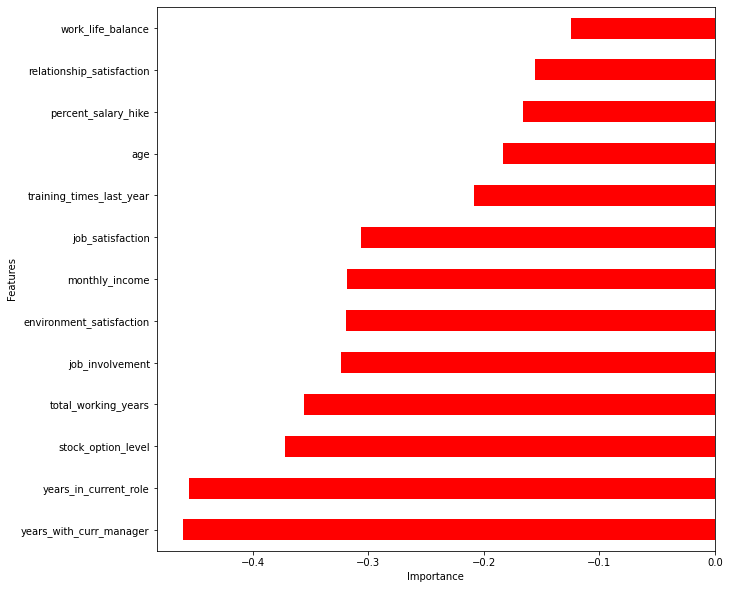

In [70]:
linear_model_feature_importance(
  feature_col_names = x.columns, 
  coeff = logreg_balancedv2.coef_[0], #feature importance for label 0
  stddevs = np.std(x).values, 
  n_top = 13, 
  n_bottom = 0
);

If there is no multicollinearity between features, this feature importance will be **accurate**. **VIF** analysis can be used to decrease the amount of characteristics while boosting interpretability.

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def remove_vif(x:pd.DataFrame, vif_treshold=10):
  #Variance Inflation Factors (VIF)
  #> 10: An indication that multicollinearity may be present
  #> 100: Certain multicollinearity among the variables

  selected_features = [i for i in range(0, x.shape[1])];
  curr_features = [i for i in range(0, len(selected_features))];

  print(selected_features);
  print(curr_features);

  for l in range(0, x.shape[1]):
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(x.iloc[:,selected_features].values, i) for i in curr_features]
    max_VIF = 0;
    removed_idx = -1;
    for i in range(0, len(VIF)):
      if(VIF[i] > max_VIF): 
        removed_idx = i;
        max_VIF = VIF[i]
    if(removed_idx==-1): return selected_features;
    if(max_VIF >= vif_treshold): #if vif is more than treshold, remove it from the dataset
      print(f"""{l+1}. {x.iloc[:,selected_features].columns[removed_idx]} with VIF {max_VIF} removed from features""");
      selected_features.remove(selected_features[removed_idx]);
      curr_features = [i for i in range(0, len(selected_features))];
    else: return selected_features;

In [72]:
selected_feature_idxs = remove_vif(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
1. performance_rating with VIF 115.69973645481019 removed from features
2. job_level with VIF 49.334750309067566 removed from features
3. age with VIF 31.86509820174205 removed from features
4. percent_salary_hike with VIF 15.091533191495763 removed from features
5. work_life_balance with VIF 13.716283863806309 removed from features
6. job_involvement with VIF 13.247319588375856 removed from features
7. total_working_years with VIF 10.667395827917705 removed from features


In [73]:
_x = x.iloc[:,selected_feature_idxs];

logreg_imbalanced = LogisticRegression(fit_intercept=True, solver='newton-cg', random_state=0);
logreg_imbalanced.fit(_x,y);
print("logreg_imbalanced accuracy: ",logreg_imbalanced.score(_x,y));

#how will our model perform if we take new unseen data
cvs_imbalanced = cross_val_score(logreg_imbalanced,_x,y,cv=5);
print("crossvalidation logreg_imbalanced accuracy: \n", cvs_imbalanced);
print("avg crossvalidation logreg_imbalanced accuracy:", np.mean(cvs_imbalanced));
print("\n");

#how will our model perform if we take new unseen data + we don't discriminate target with less sample
cvs_imbalanced = cross_val_score(logreg_imbalanced,_x,y,cv=5,scoring='balanced_accuracy');
print("crossvalidation logreg_imbalanced balanced_accuracy: \n", cvs_imbalanced);
print("avg crossvalidation logreg_imbalanced balanced_accuracy:", np.mean(cvs_imbalanced));
print("\n");

##how will our model perform if we take new unseen data + if we average all possible class tresholds (ex: using 0.6 instead of 0.5, etc)
cvs_imbalanced = cross_val_score(logreg_imbalanced,_x,y,cv=5,scoring='roc_auc_ovr');
print("crossvalidation logreg_imbalanced roc_auc_ovr: \n", cvs_imbalanced);
print("avg crossvalidation logreg_imbalanced roc_auc_ovr:", np.mean(cvs_imbalanced));

logreg_imbalanced accuracy:  0.8489795918367347
crossvalidation logreg_imbalanced accuracy: 
 [0.84353741 0.84693878 0.8537415  0.84693878 0.84353741]
avg crossvalidation logreg_imbalanced accuracy: 0.846938775510204


crossvalidation logreg_imbalanced balanced_accuracy: 
 [0.54598577 0.53963415 0.57700922 0.56434663 0.52786631]
avg crossvalidation logreg_imbalanced balanced_accuracy: 0.5509684147847164


crossvalidation logreg_imbalanced roc_auc_ovr: 
 [0.73932927 0.73915989 0.72857266 0.73313808 0.74209665]
avg crossvalidation logreg_imbalanced roc_auc_ovr: 0.7364593101418138


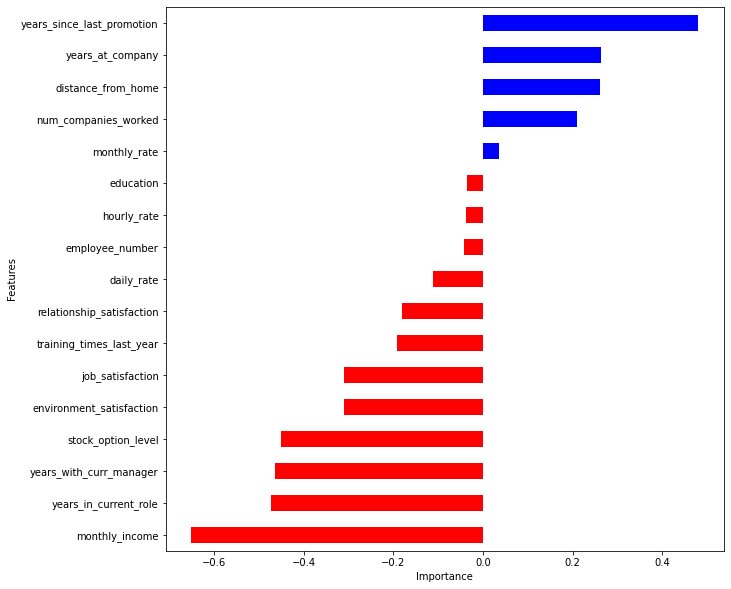

In [74]:
linear_model_feature_importance(
  feature_col_names = _x.columns, 
  coeff = logreg_imbalanced.coef_[0], #feature importance for label 0
  stddevs = np.std(_x).values, 
  n_top = _x.shape[1], 
  n_bottom = 0
);

After  use **VIF analysis to reduce number of features and increasing interpretability** our model's accuracy is increases but balance accuracy is decreases

#**Employee Clustering**

In [75]:
df_cluster =df[['attrition','job_satisfaction','environment_satisfaction','relationship_satisfaction','work_life_balance','job_involvement']]
df_cluster = df[
  df['attrition'].isin(['Yes'])]
df_cluster = df_cluster.groupby(['age_group','job_level']).agg(job_satisfaction=('job_satisfaction','mean'),environment_satisfaction=('environment_satisfaction','mean'),relationship_satisfaction=('relationship_satisfaction', 'mean'),work_life_balance=('work_life_balance', 'mean'),job_involvement=('job_involvement', 'mean') )
df_cluster

job_satisfaction  environment_satisfaction  \
age_group  job_level                                               
Boomers    1                  3.500000                  4.000000   
           3                  2.500000                  3.500000   
           5                  2.000000                  4.000000   
Gen X      1                  2.750000                  2.500000   
           2                  2.500000                  2.300000   
           3                  2.769231                  2.000000   
           4                  2.333333                  2.333333   
           5                  2.333333                  2.000000   
Gen Z      1                  2.536585                  2.731707   
           2                  3.000000                  2.000000   
Millenials 1                  2.318182                  2.431818   
           2                  2.461538                  2.410256   
           3                  2.411765                  2.470588   
           4                  3.000000                  1.500000   
           5                  3.000000                  2.000000   

                      relationship_satisfaction  work_life_balance  \
age_group  job_level                                                 
Boomers    1                           2.500000           2.500000   
           3                           4.000000           2.000000   
           5                           4.000000           3.000000   
Gen X      1                           3.250000           2.750000   
           2                           2.800000           2.800000   
           3                           2.923077           2.923077   
           4                           2.666667           1.666667   
           5                           3.000000           3.000000   
Gen Z      1                           2.463415           2.853659   
           2                           2.000000           3.333333   
Millenials 1                           2.568182           2.579545   
           2                           2.461538           2.538462   
           3                           2.117647           2.588235   
           4                           4.000000           2.500000   
           5                           4.000000           3.000000   

                      job_involvement  
age_group  job_level                   
Boomers    1                 2.500000  
           3                 2.500000  
           5                 3.000000  
Gen X      1                 2.916667  
           2                 2.700000  
           3                 2.461538  
           4                 2.666667  
           5                 1.666667  
Gen Z      1                 2.536585  
           2                 2.666667  
Millenials 1                 2.454545  
           2                 2.435897  
           3                 2.588235  
           4                 3.500000  
           5                 3.000000

Lets determine cluster number with **elbow** method first

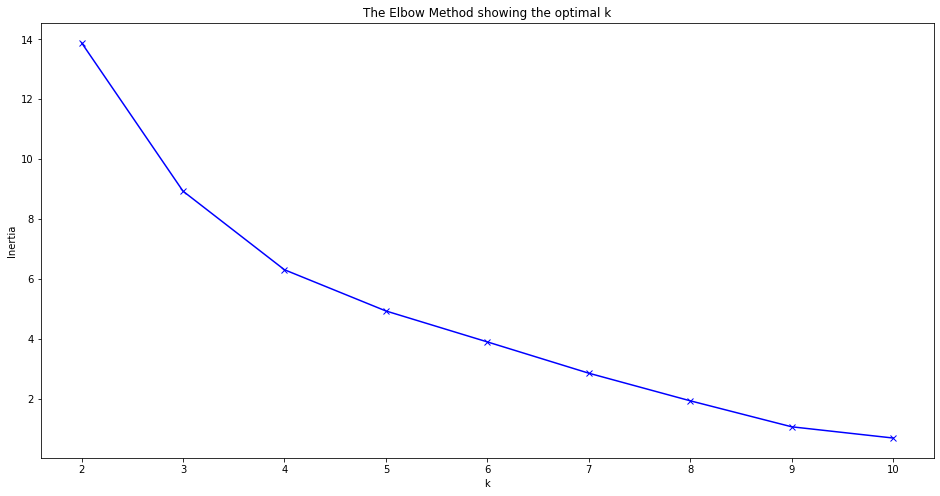

In [76]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Create a cluster range that make sense for business which from 2 to 10

In [77]:
!gdown https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l

Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 6.86MB/s]


In [78]:
from silhoutte import silhoutte_analysis

For n_clusters = 2 The average silhouette_score is : 0.38629517016627
For n_clusters = 3 The average silhouette_score is : 0.40256935836747587
For n_clusters = 4 The average silhouette_score is : 0.4109214257981403
For n_clusters = 5 The average silhouette_score is : 0.2425039598577466
For n_clusters = 6 The average silhouette_score is : 0.23103189567054494
For n_clusters = 7 The average silhouette_score is : 0.24268310888332106
For n_clusters = 8 The average silhouette_score is : 0.19820109793214236
For n_clusters = 9 The average silhouette_score is : 0.22421073927245444
For n_clusters = 10 The average silhouette_score is : 0.17255786263427955


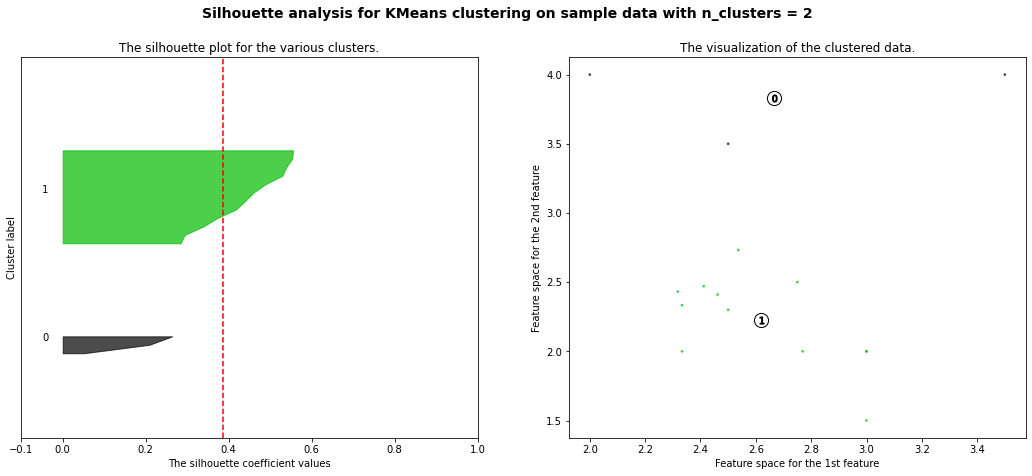

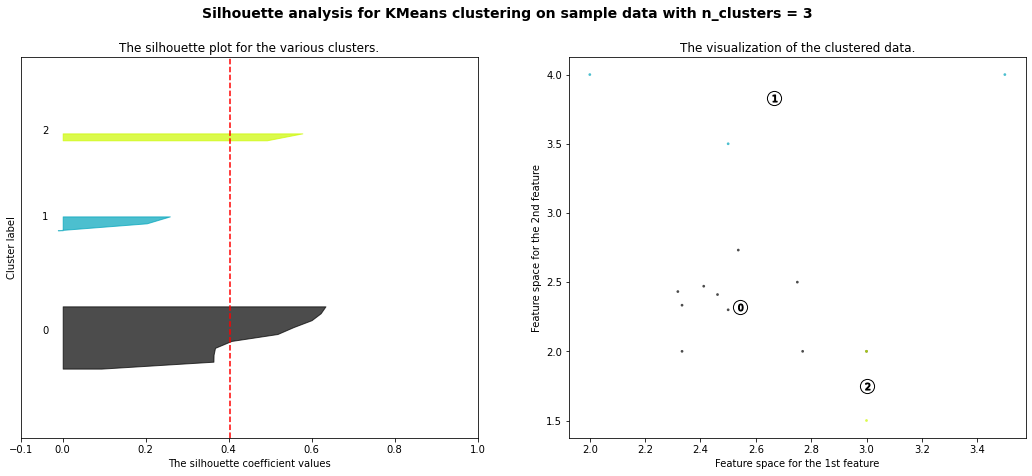

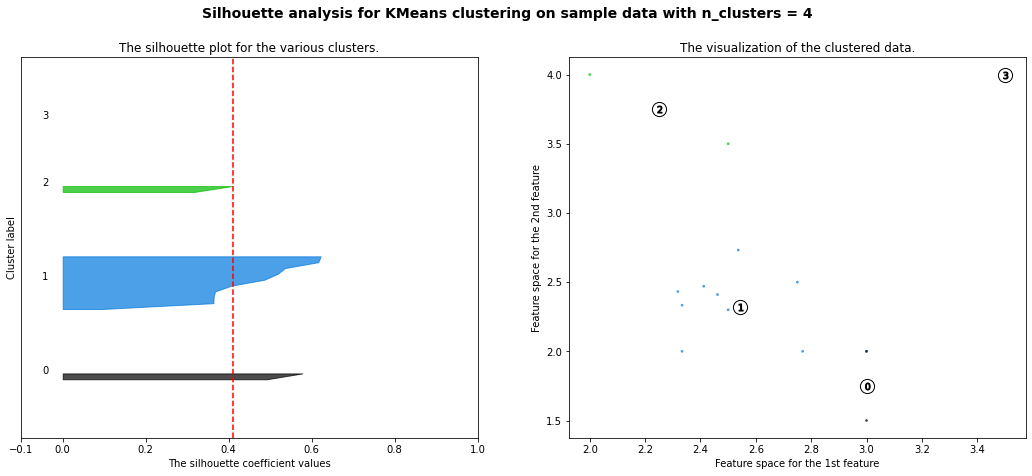

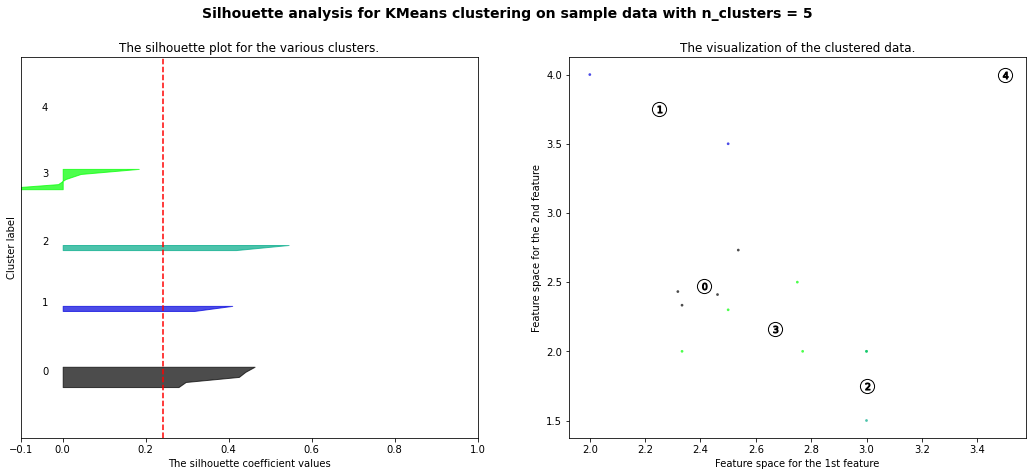

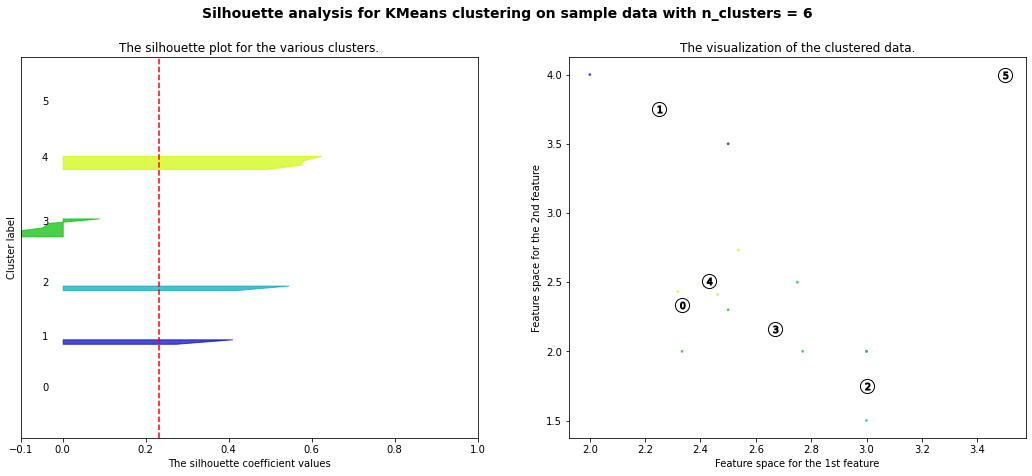

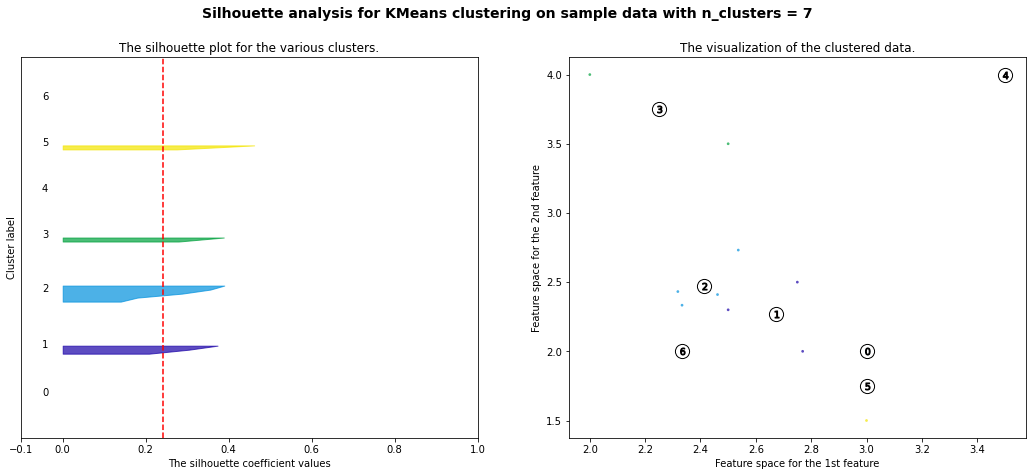

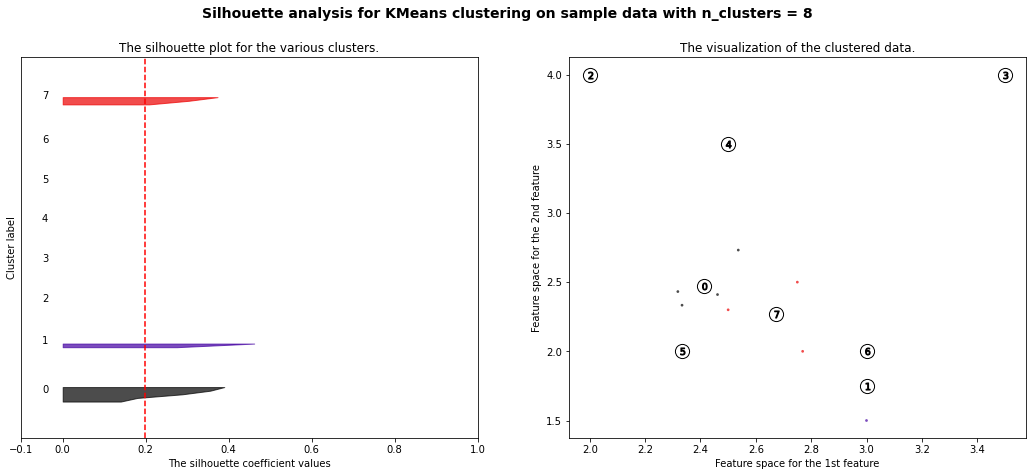

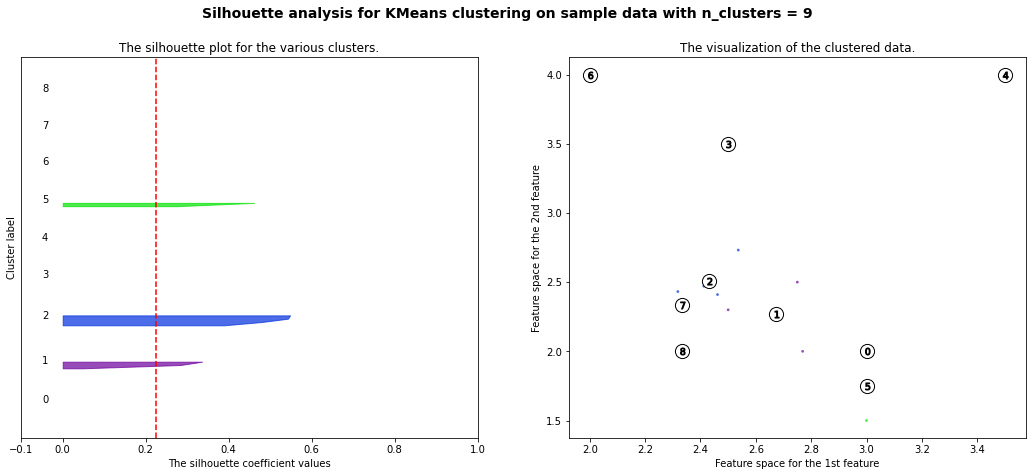

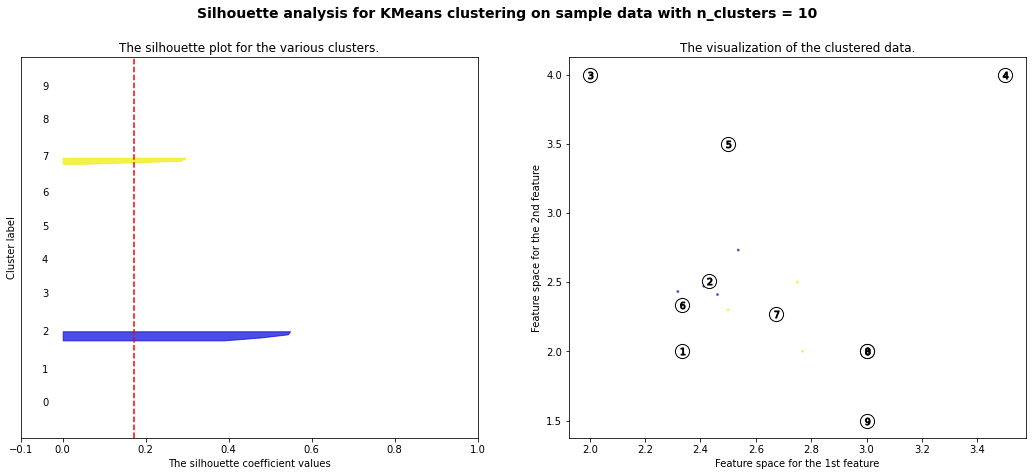

In [79]:
#from silhoutte import silhoutte_analysis
silhoutte_analysis(df_cluster,list(range(2,11)))

Based on elbow method and silhoutte analysis above, we can choose cluster = 4

In [80]:
cluster_model = cluster.KMeans(n_clusters=4, random_state=3)
cluster_label = cluster_model.fit_predict(df_cluster)
df_cluster['cluster'] = cluster_label
df_cluster

job_satisfaction  environment_satisfaction  \
age_group  job_level                                               
Boomers    1                  3.500000                  4.000000   
           3                  2.500000                  3.500000   
           5                  2.000000                  4.000000   
Gen X      1                  2.750000                  2.500000   
           2                  2.500000                  2.300000   
           3                  2.769231                  2.000000   
           4                  2.333333                  2.333333   
           5                  2.333333                  2.000000   
Gen Z      1                  2.536585                  2.731707   
           2                  3.000000                  2.000000   
Millenials 1                  2.318182                  2.431818   
           2                  2.461538                  2.410256   
           3                  2.411765                  2.470588   
           4                  3.000000                  1.500000   
           5                  3.000000                  2.000000   

                      relationship_satisfaction  work_life_balance  \
age_group  job_level                                                 
Boomers    1                           2.500000           2.500000   
           3                           4.000000           2.000000   
           5                           4.000000           3.000000   
Gen X      1                           3.250000           2.750000   
           2                           2.800000           2.800000   
           3                           2.923077           2.923077   
           4                           2.666667           1.666667   
           5                           3.000000           3.000000   
Gen Z      1                           2.463415           2.853659   
           2                           2.000000           3.333333   
Millenials 1                           2.568182           2.579545   
           2                           2.461538           2.538462   
           3                           2.117647           2.588235   
           4                           4.000000           2.500000   
           5                           4.000000           3.000000   

                      job_involvement  cluster  
age_group  job_level                            
Boomers    1                 2.500000        3  
           3                 2.500000        2  
           5                 3.000000        2  
Gen X      1                 2.916667        0  
           2                 2.700000        0  
           3                 2.461538        0  
           4                 2.666667        0  
           5                 1.666667        0  
Gen Z      1                 2.536585        0  
           2                 2.666667        0  
Millenials 1                 2.454545        0  
           2                 2.435897        0  
           3                 2.588235        0  
           4                 3.500000        1  
           5                 3.000000        1

In [81]:
df_cluster.groupby(['cluster'])['job_satisfaction'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,10,2.541397,2.480769,3.0,2.318182
1,2,3.000000,3.000000,3.0,3.000000
2,2,2.250000,2.250000,2.5,2.000000
3,1,3.500000,3.500000,3.5,3.500000


In [82]:
df_cluster.groupby(['cluster'])['environment_satisfaction'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,10,2.31777,2.371795,2.731707,2.0
1,2,1.75000,1.750000,2.000000,1.5
2,2,3.75000,3.750000,4.000000,3.5
3,1,4.00000,4.000000,4.000000,4.0


In [83]:
df_cluster.groupby(['cluster'])['relationship_satisfaction'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,10,2.625053,2.617424,3.25,2.0
1,2,4.000000,4.000000,4.00,4.0
2,2,4.000000,4.000000,4.00,4.0
3,1,2.500000,2.500000,2.50,2.5


In [84]:
df_cluster.groupby(['cluster'])['work_life_balance'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,10,2.703298,2.775,3.333333,1.666667
1,2,2.750000,2.750,3.000000,2.500000
2,2,2.500000,2.500,3.000000,2.000000
3,1,2.500000,2.500,2.500000,2.500000


In [85]:
df_cluster.groupby(['cluster'])['job_involvement'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,10,2.509347,2.56241,2.916667,1.666667
1,2,3.250000,3.25000,3.500000,3.000000
2,2,2.750000,2.75000,3.000000,2.500000
3,1,2.500000,2.50000,2.500000,2.500000


#**Summary**

**Relationship between features**
- **Age** have high correlation with **job level** and **monthly income**, it expected because the older employee tend to have higher position in the company followed by higher monthly income.
- **Total working years** have high correlation with **age**,  **job level**, and **monthly income**, which expected nbecause senior employee have longer work duration in the company.
- **Performance rating** is highly corelated **percent salary hike** which expected the higher performence of the employee the higher the  salary hike
- **Years at company** have high correlation with **years current role**, **manager**, and **last promotion**. 

<br>

**Plotting each features with attrition rate**
- **Sales department** and **Sales Representatitive** roles tend to leave company.
- **Gen Z** tend to leave the company which expected because Gen Z tend to change jobs after short periods of time (within 1-3 months).
- **Single employees** tend to leave company than divorced and married employees.
- The lower employee's **environment satisfaction, job satisfaction, relationship satisfaction, work-life balance, and job involvement** - the higher percentage of their attrition.
- Employee who are **not get well paid monthly** have low **percent salary hike** tend to leave the company.
- Employee that have worked in more than 4 different companies tend to leave company.
- Employee who worked in the company less than 10 years tend to leave company.


<br>

**Logistic Regression** <br>
Top features affecting Employee Attrition : <br>
a. **Monthly Income** : reviewing employee salaries and providing compensation based on work performance in order to keep motivating and rewarding their hard work. <br>
b. **Years in current role**, **years in current managers** and **years since last promotion** : The longer they are in the same position and manager will make employees feel they don't have professional growth in the company. Therefore, try to offfer them the opportunity to develop their skill set and to practice their abilities from small project. Then recruit the potential employee.<br>
c. **Stock Option Level** : Employee stock plans can be a low-cost strategy of retaining employees.<br>
d. **Environment and Job Satisfaction** : determining what caused their dissatisfaction and what actions could be taken to improve the workplace.<br>
e. **Distance from home** : hire employee who dont have a house that is too far from the office, apply remote working if it neccessary


